## Recipe 6
Linear models assume that the independent variables are normally distributed. In this recipe, we will learn how to assess normal distributions of variables.

In [1]:
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

In [ ]:
boston = pd.read_csv('boston.csv')
boston.head()

In [3]:
# this is the information about the boston house prince dataset
# get familiar with the variables before continuing with 
# the notebook

# the aim is to predict the "Median value of the houses"
# MEDV column of this dataset

# and we have variables with characteristics about
# the homes and the neighborhoods
boston.info

<bound method DataFrame.info of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24

In [4]:
boston.describe

<bound method NDFrame.describe of         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  

In [ ]:
# I will create a dataframe with the variable x that
# follows a normal distribution 

# this will provide the expected plots
# i.e., how the plots should look like if the
# assumption is met

np.random.seed(29) # for reproducibility

n = 200 # in the book, we pass 200 within brackets directly, without defining n
x = np.random.randn(n)

data = pd.DataFrame([x]).T
data.columns = ['x']
data.head()

In [ ]:
# histogram of the simulated independent variable x
# which we know follows a Gaussian distribution

sns.histplot(data['x'], bins=30, kde=True)

In [ ]:
# histogram of the variable RM from the boston
# house price dataset from sklearn
# RM is the average number of rooms per dwelling

sns.histplot(boston['RM'], bins=30, kde=True)

In [ ]:
# histogram of the variable LSTAT
# (% lower status of the population)

sns.histplot(boston['LSTAT'], bins=30, kde=True)

Normality can be also assessed by Q-Q plots.
In a Q-Q plot we plot the quantiles of the variable in the y-axis and the expected quantiles of
the normal distribution in the x-axis. If the variable follows a normal distribution, the 
dots in the Q-Q plot should fall in a 45 degree diagonal line as indicated below.  

In [ ]:
# let's plot the Q-Q plot for the simualted data.
# the dots should adjust to the 45 degree line

stats.probplot(data['x'], dist="norm", plot=plt)
plt.show()

In [ ]:
# let's do the same for RM
stats.probplot(boston['RM'], dist="norm", plot=plt)
plt.show()

In [ ]:
# just for comparison, let's go ahead and plot CRIM
stats.probplot(boston['CRIM'], dist="norm", plot=plt)
plt.show()

## Recipe 7

In this recipe, we will visualize the variable distributions

In [ ]:
boston.head()

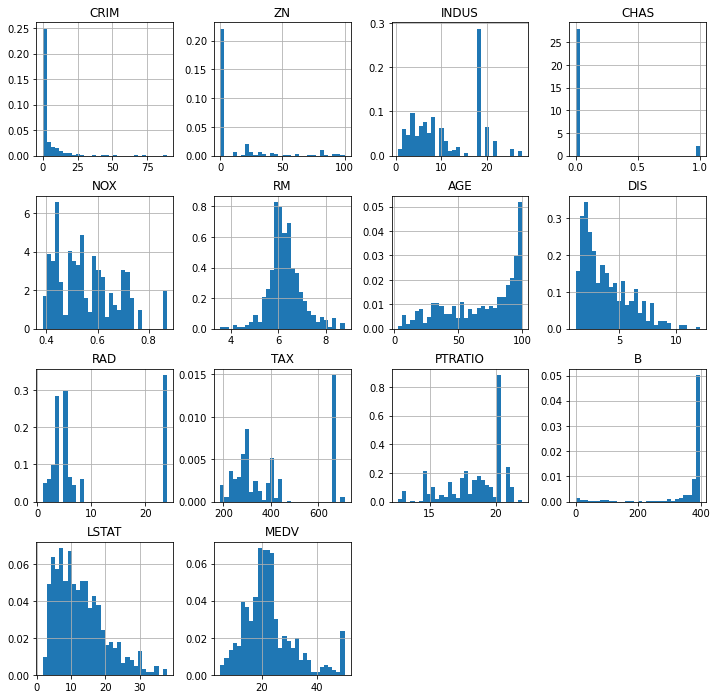

In [13]:
boston.hist(bins=30, figsize=(12,12), density=True)
plt.show()

## Recipe 8
An outlier is a data point which is significantly different from the remaining data. "An outlier is an observation which deviates so much from the other observations as to arouse suspicions that it was generated by a different mechanism." [D. Hawkins. Identification of Outliers, Chapman and Hall , 1980.]

In this recipe, we will learn to identify outliers using boxplots and the inter-quantile range proximity rule.

According to the inter-quantile range proximity rule, a value is an outlier if it falls outside the below boundaries:

- Upper boundary = 75th quantile + (IQR * 1.5)

- Lower boundary = 25th quantile - (IQR * 1.5)

where the inter-quantile range (IQR) is given by:

- IQR = 75th quantile - 25th quantile

In [ ]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['RM'])
plt.title('Boxplot')

In [ ]:
# boxplot
plt.figure(figsize=(3,6))
sns.boxplot(y=boston['LSTAT'])
plt.title('Boxplot')

In [15]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# function as presented in the book

def find_boundaries(df, variable):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [16]:
# we find the boudaries for the variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM')
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [17]:
# not let's find in a dataframe those outliers:

# the function finds the upper and lower boundaries
# using the IQR proximity rule

# alternative, also presented in the book
# passing the distance as a function argument
# to allow for versatility

def find_boundaries(df, variable, distance):

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [18]:
# we find the boudaries for the variable RM

upper_boundary, lower_boundary = find_boundaries(boston, 'RM', 1.5)
upper_boundary, lower_boundary

(7.730500000000001, 4.778499999999999)

In [20]:
# let's flag the outliers in the data set

outliers = np.where(boston['RM'] > upper_boundary, True,
                    np.where(boston['RM'] < lower_boundary, True, False))

In [21]:
# how many outliers did we find?
outliers.sum()

30

In [22]:
# let's print a few of them

outliers_df = boston.loc[outliers, 'RM']
outliers_df.head()

97     8.069
98     7.820
162    7.802
163    8.375
166    7.929
Name: RM, dtype: float64

In [23]:
tmp = boston.loc[~outliers, 'RM']
tmp.shape

(476,)

## Recipe 9
Many machine learning algorithms are sensitive to the scale of the features. In this recipe, we will learn to visualize the feature magnitudes and most common statistical metrics.

In [24]:
# let's have a look at the values of those variables
# to get an idea of the feature magnitudes

boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [25]:
# let's now calculate the range of the variables

boston.max() - boston.min()

CRIM        88.96988
ZN         100.00000
INDUS       27.28000
CHAS         1.00000
NOX          0.48600
RM           5.21900
AGE         97.10000
DIS         10.99690
RAD         23.00000
TAX        524.00000
PTRATIO      9.40000
B          396.58000
LSTAT       36.24000
MEDV        45.00000
dtype: float64